In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading the dataset

In [3]:
url = 'https://raw.githubusercontent.com/DinushaSan/Projects-/master/Booklist.csv'
books = pd.read_csv(url)
books.head()

,No,Category,Name,Author,KeyWords,Top 5 Key Words
0,1,Religious,AmaWathura,Gurulugomi,"Gurulugomi, Gatapada, Parani, Pali, Attakatha,...","Gurulugomi,Gatapada, Parani,Attakatha, Jathaka"
1,2,Religious,ButhSarana,Widyachakrawarthin,"Widyachakrawarthin, Jathaka, Weera Katha, Para...","Widyachakrawarthin, Jathaka,Parani,Anukampawa,..."
2,3,Religious,Paramartha Wibagaya Sahitha Winayopadeshaya,Witiyala Sri Sarananda Maha Sthawira,"Upadesha, Winaya Karma, Pooja Krama, Daramaya,...","Srala Basa, Upadesha, Winaya Karma, Pooja Kram..."
3,4,Religious,Pachna Prabha,Thrikunamalaye Ananda Sthawira,"Prachnawa, Weerya, Arisen Ahubudu, Samajaya, N...","Arisen Ahubudu,Nirwanaya, Seelaya,Samajaya,Pr..."
4,5,Religious,Budu Dahama Ha Buddagama,M.M.J Marasingha,"Parinirwanaya, Baudda Ithihasaya, Ethihasika S...","Parinirwanaya,Baudda Ithihasaya, Ethihasika St..."


## Cleaning the dataset

In [4]:
books = books[['Category','Name','Author','KeyWords']]

In [5]:
books.head()

,Category,Name,Author,KeyWords
0,Religious,AmaWathura,Gurulugomi,"Gurulugomi, Gatapada, Parani, Pali, Attakatha,..."
1,Religious,ButhSarana,Widyachakrawarthin,"Widyachakrawarthin, Jathaka, Weera Katha, Para..."
2,Religious,Paramartha Wibagaya Sahitha Winayopadeshaya,Witiyala Sri Sarananda Maha Sthawira,"Upadesha, Winaya Karma, Pooja Krama, Daramaya,..."
3,Religious,Pachna Prabha,Thrikunamalaye Ananda Sthawira,"Prachnawa, Weerya, Arisen Ahubudu, Samajaya, N..."
4,Religious,Budu Dahama Ha Buddagama,M.M.J Marasingha,"Parinirwanaya, Baudda Ithihasaya, Ethihasika S..."


In [6]:
#checking for null values
books.isnull().sum()

Category    0
Name        0
Author      0
KeyWords    0
dtype: int64

In [7]:
books.shape

(200, 4)

In [8]:
#Getting top 5 keywords
books['KeyWords'] = books['KeyWords'].map(lambda x: x.split(',')[:5])

In [9]:
books.head()

,Category,Name,Author,KeyWords
0,Religious,AmaWathura,Gurulugomi,"[Gurulugomi, Gatapada, Parani, Pali, Attak..."
1,Religious,ButhSarana,Widyachakrawarthin,"[Widyachakrawarthin, Jathaka, Weera Katha, ..."
2,Religious,Paramartha Wibagaya Sahitha Winayopadeshaya,Witiyala Sri Sarananda Maha Sthawira,"[Upadesha, Winaya Karma, Pooja Krama, Daram..."
3,Religious,Pachna Prabha,Thrikunamalaye Ananda Sthawira,"[Prachnawa, Weerya, Arisen Ahubudu, Samajay..."
4,Religious,Budu Dahama Ha Buddagama,M.M.J Marasingha,"[Parinirwanaya, Baudda Ithihasaya, Ethihasik..."


## Plotting the graph according to category

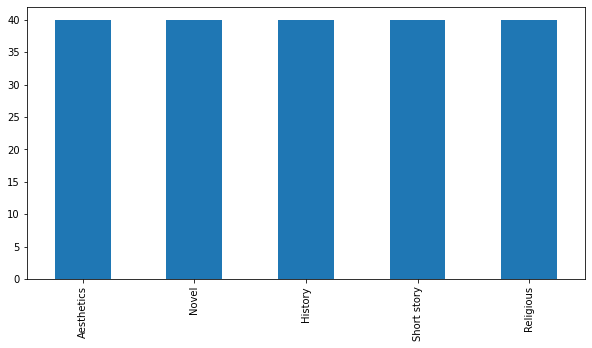

In [10]:
books['Category'].value_counts().plot(x = 'Category', y ='count', kind = 'bar', figsize = (10,5)  )

## Recommend books of  the same category 

In [11]:
def recommenderCategory(Name, Category):
    bookdata = books.loc[books['Category'] == Category]  
    bookdata.reset_index(level = 0, inplace = True)
    indices = pd.Series(bookdata.index, index = bookdata['Name'])
#applying tifdif matrix to data
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(bookdata['Name'])
#applying cosine similarity matrix
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    idx = indices[Name]
    sig = list(enumerate(sg[idx]))
# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 10 most similar books 
    sig = sig[1:11]
# Book indicies
    book_indices = [i[0] for i in sig]
    rec = bookdata[['Name']].iloc[book_indices]
    return rec

In [12]:
recommenderCategory('AmaWathura','Religious')

,Name
1,ButhSarana
2,Paramartha Wibagaya Sahitha Winayopadeshaya
3,Pachna Prabha
4,Budu Dahama Ha Buddagama
5,Datawanshaya
6,Maha Bodhi Wansha Granthi Padaya
7,Pansiya Panas Jathaka Katha Potha Saha Gatum N...
8,Sahana
9,Baudda Darshanaya Adyanaya
10,Chaththalisakara Maha Wipassana Bawanawa


## Recommend the books according to similarity of keywords(Plot-based)

### Creating the soup of keywords

In [13]:
def sanitizing(x):
    if isinstance(x, list):
        #Strip spaces and convert to lowercase
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [14]:
for feature in [ 'KeyWords']:
    books[feature] = books[feature].apply(sanitizing)

In [15]:
def create_soup(x):
    return ' '.join(x['KeyWords'])

In [16]:
books['soup'] = books.apply(create_soup, axis=1)

In [17]:
books.iloc[0]['soup']

'gurulugomi gatapada parani pali attakatha'

### Applying cosine similarity matrix for keywords

In [18]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['soup'])

In [19]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [20]:
print(cosine_sim)

[[1.         0.2        0.         ... 0.         0.         0.        ]
 [0.2        1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.4        0.18257419]
 [0.         0.         0.         ... 0.4        1.         0.18257419]
 [0.         0.         0.         ... 0.18257419 0.18257419 1.        ]]


In [21]:
books = books.reset_index()
indices = pd.Series(books.index, index=books['Name'])

In [22]:
def content_recommender_by_keywords(Name, cosine_sim = cosine_sim,books= books,indices= indices):
    idx = indices[Name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse=True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    return books['Name'].iloc[book_indices]

In [23]:
#Recommending most similar 5 books
content_recommender_by_keywords('ButhSarana', cosine_sim,books, indices)

0                      AmaWathura
28    Wishuddi Marga Maha Sannasa
29               Wishuddi Margaya
34         Nabi nayaka Charithaya
35              Bagawath Geethawa
Name: Name, dtype: object